# Intorduction
The dataset for this competition (both train and test) was generated from a deep learning model trained on the [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html).
Feature distributions are close to, but not exactly the same, as the original.

This dataset was derived from the 1990 U.S. census, using one row per census block group.
The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

Data ranges, and data types for each feature in the data set are as follows, their names are pretty self explanitory:
* `MedInc` - Median income in block group
* `HouseAge` - Median house age in block group
* `AveRooms` - Average number of rooms per household
* `AveBedrms` - Average number of bedrooms per household
* `Population` - Block group population
* `AveOccup` - Average number of household members
* `Latitude` - Block group latitude
* `Longitude` - Block group longitude

The evaluation metric is going to be the standard Root Mean Squared Error (RMSE)!

# Import Packages

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_california_housing

from sklearn.feature_extraction.text import CountVectorizer


# EDA

In [196]:


train_set = pd.read_csv(r"D:\source\repos\Kaggle_Tabular_Playground_Series-ML\Jan-2023-S2\data\train.csv")
test_set = pd.read_csv(r"D:\source\repos\Kaggle_Tabular_Playground_Series-ML\Jan-2023-S2\data\test.csv")
sample_sub = pd.read_csv(r"D:\source\repos\Kaggle_Tabular_Playground_Series-ML\Jan-2023-S2\data\sample_submission.csv")

In [197]:
train_set.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [198]:
columns_to_vectorize = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for vector_target in columns_to_vectorize:
    vectorizer = CountVectorizer()
    vectorizer.fit_transform(train_set[vector_target])
    train_set[f'{vector_target}_v'] = vectorizer.transform(train_set[vector_target]).toarray().argmax(axis=1)[:,None]
    vectorizer.fit_transform(test_set[vector_target])
    test_set[f'{vector_target}_v'] = vectorizer.transform(test_set[vector_target]).toarray().argmax(axis=1)[:,None]

In [199]:
train_set

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_v,ever_married_v,work_type_v,Residence_type_v,smoking_status_v
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0,1,1,4,1,1
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0,1,1,4,0,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0,0,1,4,0,4
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0,1,1,4,1,1
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0,0,0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0,0,0,2,1,1
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0,0,1,4,1,1
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0,0,1,1,1,1
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0,1,1,4,0,4


In [200]:
test_set

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender_v,ever_married_v,work_type_v,Residence_type_v,smoking_status_v
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown,0,1,4,0,4
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown,1,1,4,1,4
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown,0,0,0,1,4
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes,0,1,2,1,3
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes,1,1,4,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10199,25503,Female,27.0,0,0,No,Private,Urban,75.77,17.6,never smoked,0,0,4,1,1
10200,25504,Male,49.0,0,0,Yes,Private,Urban,102.91,26.7,Unknown,1,1,4,1,4
10201,25505,Female,3.0,0,0,No,children,Rural,104.04,18.3,Unknown,0,0,0,0,4
10202,25506,Male,31.0,0,0,Yes,Private,Urban,82.41,28.7,never smoked,1,1,4,1,1


In [201]:
train_set.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_v', 'ever_married_v', 'work_type_v',
       'Residence_type_v', 'smoking_status_v'],
      dtype='object')

In [202]:
print('train_set shape: ', train_set.shape)
print('test_set shape: ', test_set.shape)

train_set shape:  (15304, 17)
test_set shape:  (10204, 16)


In [203]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
 12  gender_v           15304 non-null  int64  
 13  ever_married_v     15304 non-null  int64  
 14  work_type_v        15304 non-null  int64  
 15  Residence_type_v   15304 non-null  int64  
 16  smoking_status_v   153

In [204]:
train_set.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_v,ever_married_v,work_type_v,Residence_type_v,smoking_status_v
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296,0.382841,0.678581,2.884148,0.499216,2.017904
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981,0.486230,0.467037,1.558663,0.500016,1.532482
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000,1.000000,1.000000,4.000000,1.000000,4.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000,2.000000,1.000000,4.000000,1.000000,4.000000


## Missing Data

In [205]:
total = train_set.isnull().sum().sort_values(ascending=False)
percent = (train_set.isnull().sum()/train_set.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
id,0,0.0
bmi,0,0.0
Residence_type_v,0,0.0
work_type_v,0,0.0
ever_married_v,0,0.0
gender_v,0,0.0
stroke,0,0.0
smoking_status,0,0.0
avg_glucose_level,0,0.0
gender,0,0.0


## Data visualisation

In [206]:
features = ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_v', 'ever_married_v', 'work_type_v', 'Residence_type_v', 'smoking_status_v']
target = ['stroke']

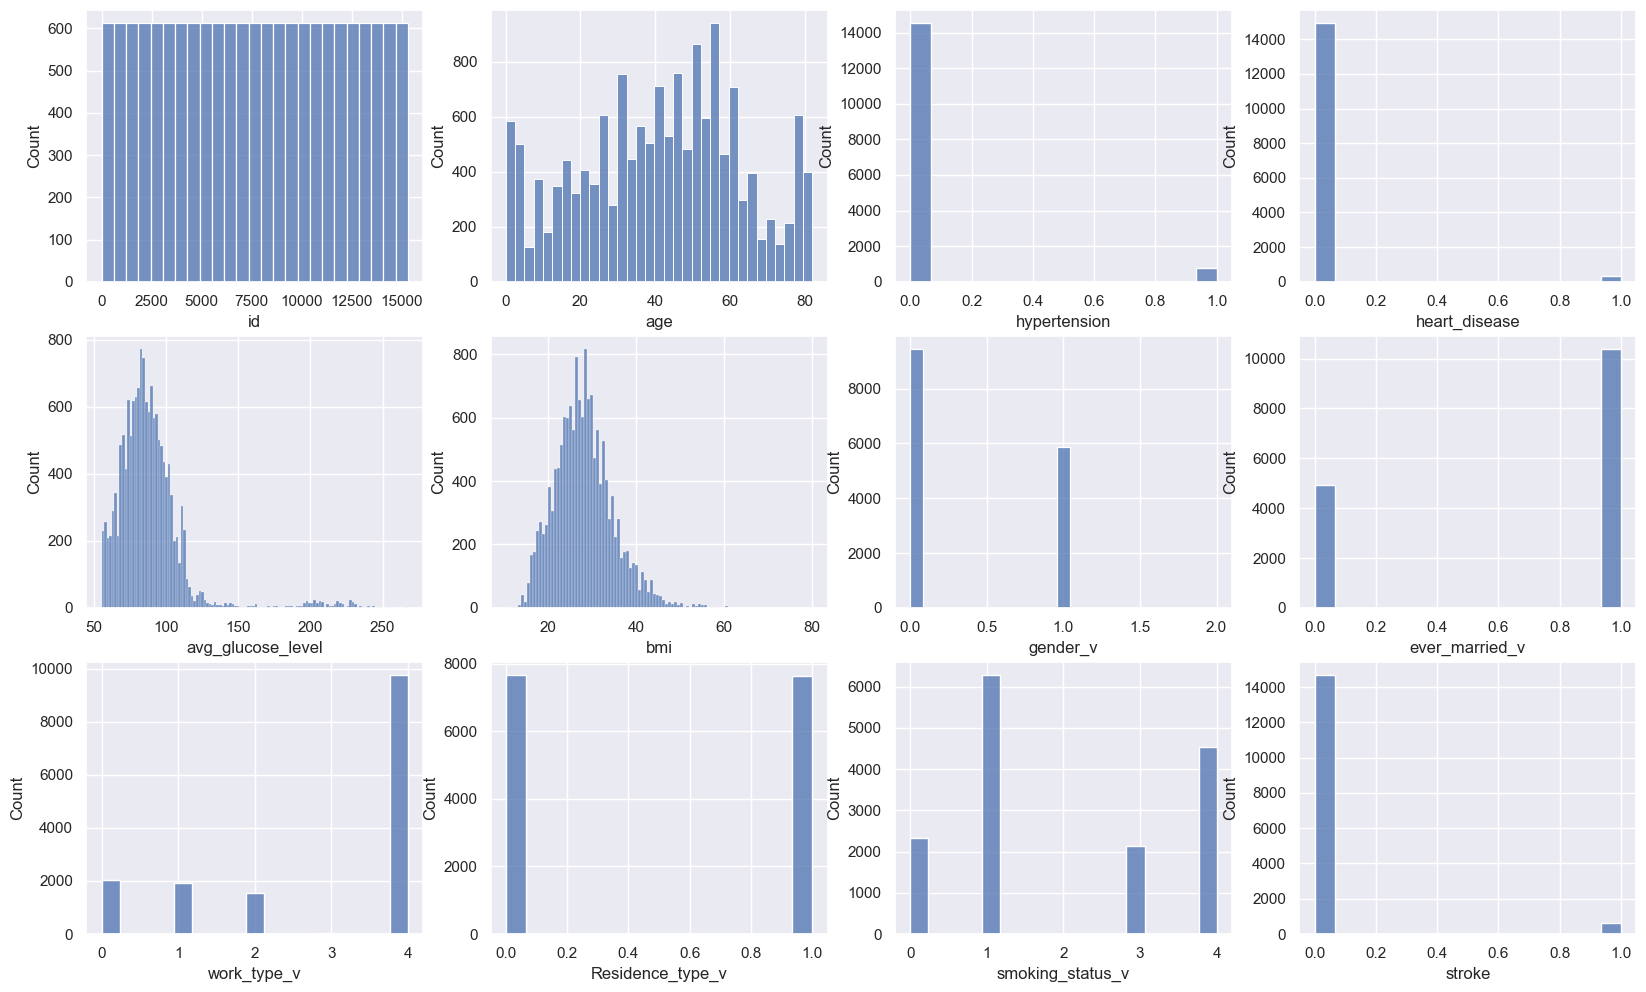

In [207]:
fig, axes = plt.subplots(3,4, figsize=(20, 12))
for i, j in zip(features+target, axes.flatten()):
    sns.histplot(train_set[i], ax=j)
plt.show()

### **Relationship with variables**

ValueError: num must be 1 <= num <= 8, not 9

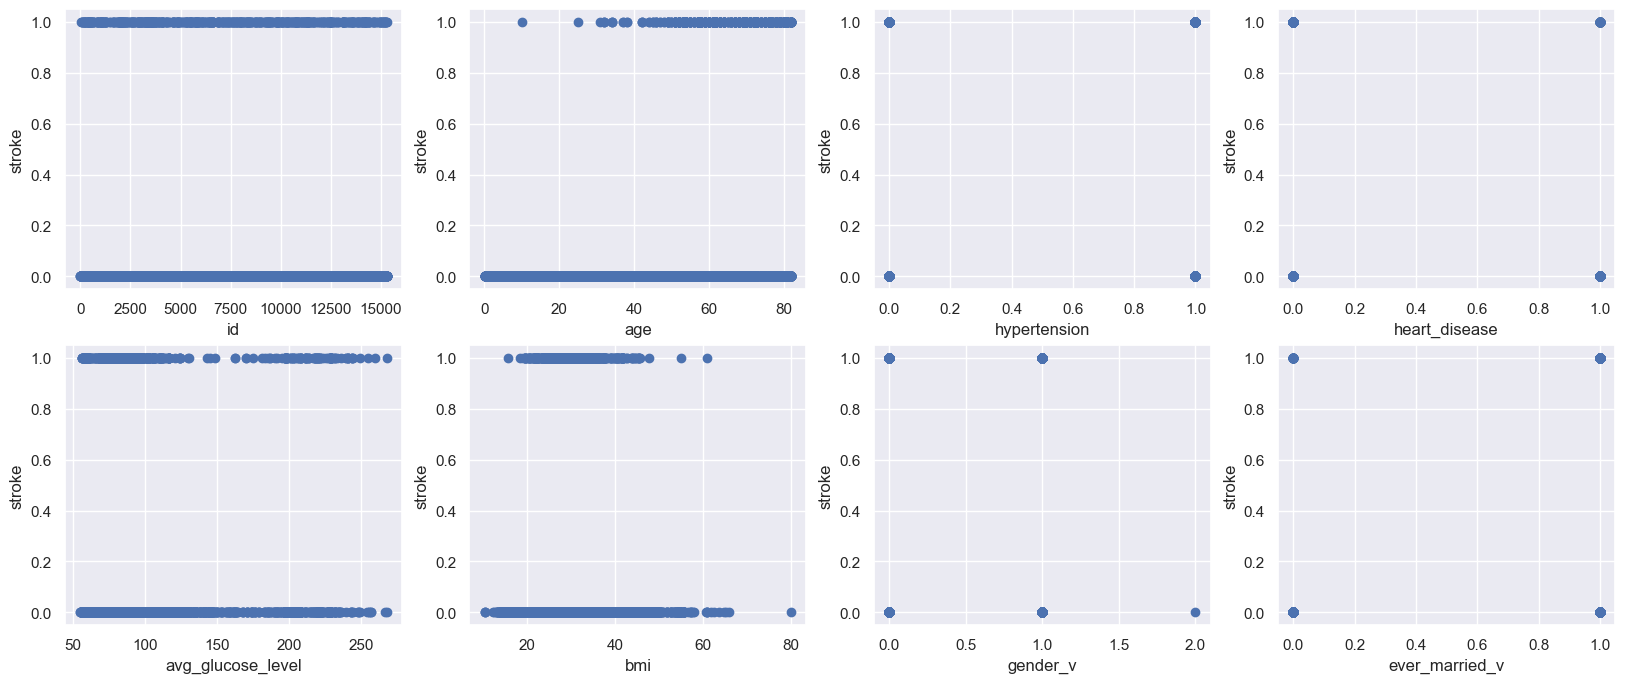

In [209]:
fig, axs = plt.subplots(2,4, figsize=(20, 8))
for i, j in enumerate(features):
    var = j
    plt.subplot(2,4,i+1)
    data = pd.concat([train_set['stroke'], train_set[var]], axis=1)
    plt.scatter(x=data[var], y=data['stroke'])
    plt.xlabel(j)
    plt.ylabel('stroke')
plt.show()

### Correlation matrix (heatmap style)

<AxesSubplot: >

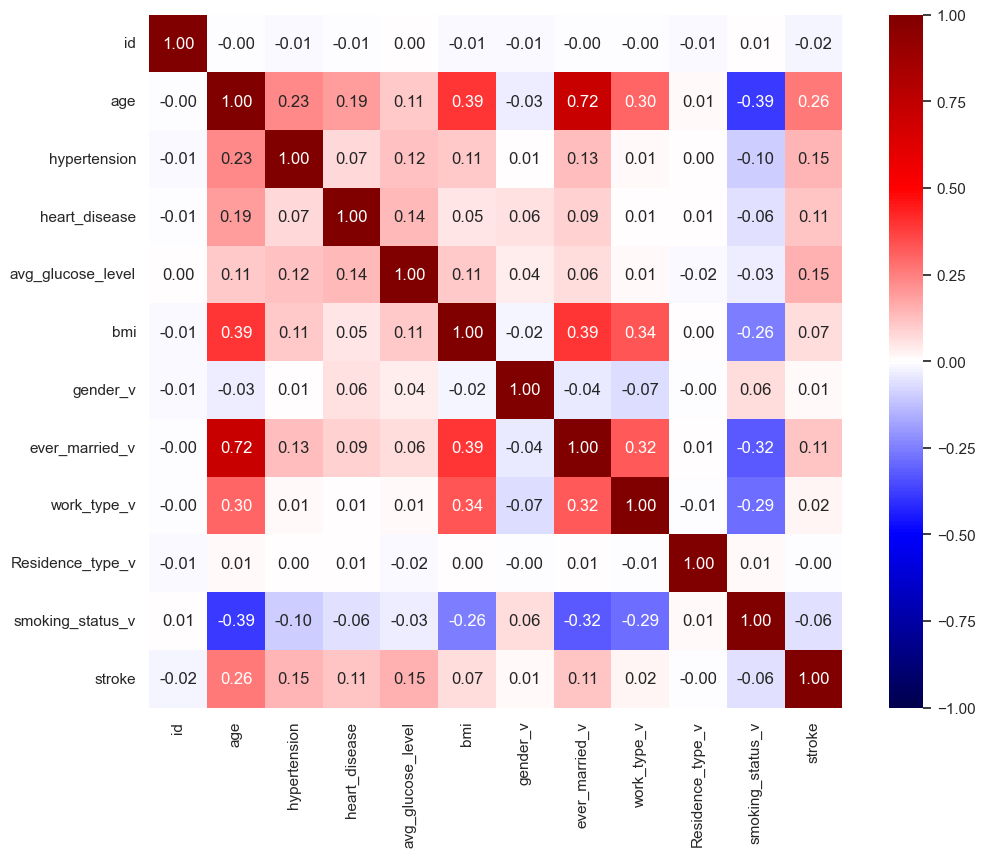

In [210]:
corrmat = train_set[features+target].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True, fmt='.2f', cmap='seismic', vmin=-1, vmax=1)

# Train Model

In [275]:
import lightgbm as lgbm
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import roc_curve, auc,recall_score,precision_score

In [212]:
scaler = MinMaxScaler().fit(train_set[features])
train_scaled = scaler.transform(train_set[features])
test_scaled = scaler.transform(test_set[features])

In [335]:
kf = KFold(n_splits=10, random_state=1, shuffle=True)
clfs = []
err = []

for i, (train_index, val_index) in enumerate(kf.split(train_set)):
    X_train, X_val = train_scaled[train_index, :], train_scaled[val_index, :]
    y_train, y_val = train_set['stroke'][train_index], train_set['stroke'][val_index]
    
    clf = XGBRegressor(n_estimators=10,
                       max_depth=3,
                       colsample_bytree=0.9,
                       subsample=1,
                       reg_lambda=20,
                       tree_method='gpu_hist',
                       seed=1)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_val)
    
    fpr, tpr, _ = roc_curve(y_val, preds)
    roc_auc = auc(fpr, tpr)
    #rmse = mean_squared_error(y_val, preds, squared=False)
    err.append(roc_auc)
    clfs.append(clf)
    print(f'roc on fold {i}: {roc_auc}')

print(f'Average RMSE (five fold): {sum(err)/10}')

roc on fold 0: 0.9011945392491468
roc on fold 1: 0.8737909911569639
roc on fold 2: 0.8759284041485447
roc on fold 3: 0.8875118060656941
roc on fold 4: 0.8733319832878582
roc on fold 5: 0.8928889302864712
roc on fold 6: 0.8825968583759912
roc on fold 7: 0.8581950473724738
roc on fold 8: 0.8907067745687149
roc on fold 9: 0.8728060344827586
Average RMSE (five fold): 0.8808951368994616


In [336]:
kf = KFold(n_splits=10, random_state=1, shuffle=True)
err = []

for i, (train_index, val_index) in enumerate(kf.split(train_set)):
    X_train, X_val = train_scaled[train_index, :], train_scaled[val_index, :]
    y_train, y_val = train_set['stroke'][train_index], train_set['stroke'][val_index]
    
    clf = lgbm.LGBMRegressor(learning_rate=0.01,
                             max_depth=900,
                             num_leaves=9000,
                             colsample_bytree=0.8,
                             subsample=0.9,
                             subsample_freq=5,
                             min_child_samples=360,
                             reg_lambda=28,
                             n_estimators=20000,
                             metric='AUC',
                             random_state=1)
    
    clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], callbacks=[lgbm.early_stopping(100, verbose=True)])
    preds = clf.predict(X_val)
    
    #rmse = mean_squared_error(y_val, preds, squared=False)
    fpr, tpr, _ = roc_curve(y_val, preds)
    roc_auc = auc(fpr, tpr)
    err.append(roc_auc)
    clfs.append(clf)
    print(f'roc_auc on fold {i}: {roc_auc}')
    print('-'*50)

print(f'Average roc_auc (five fold): {sum(err)/10}')

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's auc: 0.907038
roc_auc on fold 0: 0.9070379563553626
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[357]	valid_0's auc: 0.876048
roc_auc on fold 1: 0.8760478076639647
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.885943
roc_auc on fold 2: 0.8859429017508643
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[167]	valid_0's auc: 0.881803
roc_auc on fold 3: 0.8818029174100116
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.878251
roc_auc on f

In [337]:
kf = KFold(n_splits=10, random_state=1, shuffle=True)
err = []

for i, (train_index, val_index) in enumerate(kf.split(train_set)):
    X_train, X_val = train_scaled[train_index, :], train_scaled[val_index, :]
    y_train, y_val = train_set['stroke'][train_index], train_set['stroke'][val_index]
    
    clf = CatBoostRegressor(iterations=20000,
                            depth=9,
                            learning_rate=0.01,
                            rsm=0.88,
                            subsample=0.795,
                            min_data_in_leaf=35,
                            l2_leaf_reg=8,
                            random_strength=0.63,
                            bootstrap_type='Bernoulli',
                            grow_policy='SymmetricTree',
                            #loss_function='Logloss',
                            eval_metric='AUC',
                            task_type="CPU",
                            random_state=1,)
    
    clf.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100, verbose=1000)
    preds = clf.predict(X_val)
    
    #rmse = mean_squared_error(y_val, preds, squared=False)
    fpr, tpr, _ = roc_curve(y_val, preds)
    roc_auc = auc(fpr, tpr)
    err.append(roc_auc)
    clfs.append(clf)
    print(f'roc_auc on fold {i}: {roc_auc}')
    print('-'*50)

print(f'Average roc_auc (five fold): {sum(err)/10}')

0:	test: 0.8710518	best: 0.8710518 (0)	total: 10.4ms	remaining: 3m 28s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9065673803
bestIteration = 178

Shrink model to first 179 iterations.
roc_auc on fold 0: 0.9065673802875168
--------------------------------------------------
0:	test: 0.8551377	best: 0.8551377 (0)	total: 9.98ms	remaining: 3m 19s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8874930914
bestIteration = 247

Shrink model to first 248 iterations.
roc_auc on fold 1: 0.8874930913780398
--------------------------------------------------
0:	test: 0.8824021	best: 0.8824021 (0)	total: 11.2ms	remaining: 3m 43s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8854410617
bestIteration = 18

Shrink model to first 19 iterations.
roc_auc on fold 2: 0.8854410616705699
--------------------------------------------------
0:	test: 0.8577500	best: 0.8577500 (0)	total: 11.6ms	remaining: 3m 51s
Stopped by overfitting detector  (

In [311]:
len(clfs)

30

## feature importance

----------------------------XGBoost----------------------------


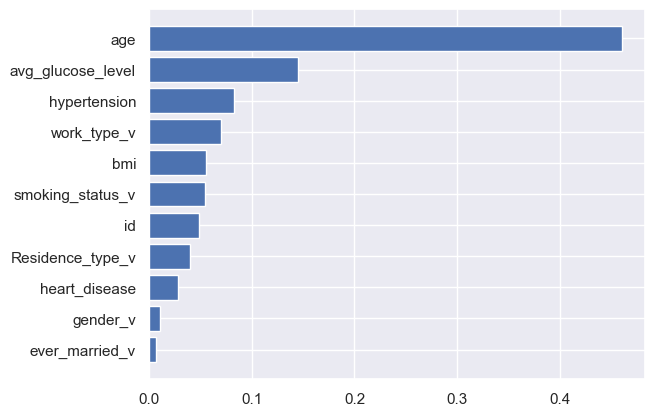

In [338]:
imp = np.zeros(11)
for clf in clfs[:10]:
    imp+= clf.feature_importances_
    
print('----------------------------XGBoost----------------------------')
plt.barh([features[i] for i in np.argsort(imp/10)], sorted(imp/10))
plt.show()

----------------------------LGBM----------------------------


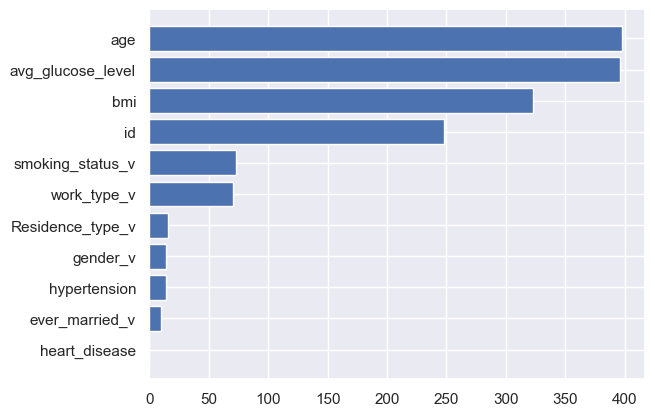

In [339]:
imp = np.zeros(11)
for clf in clfs[10:20]:
    imp+= clf.feature_importances_
    
print('----------------------------LGBM----------------------------')
plt.barh([features[i] for i in np.argsort(imp/10)], sorted(imp/10))
plt.show()

----------------------------CatBoost----------------------------


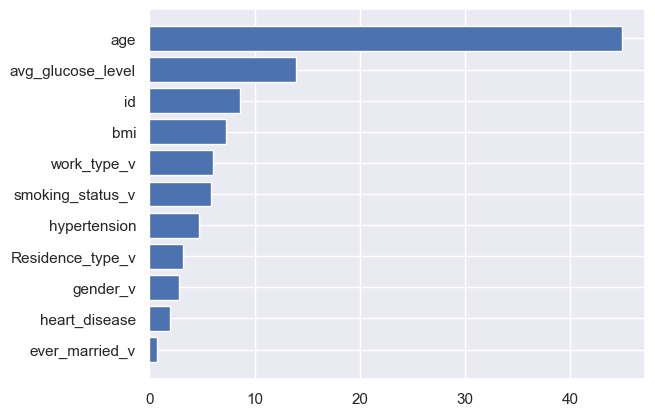

In [340]:
imp = np.zeros(11)
for clf in clfs[20:30]:
    imp+= clf.feature_importances_
    
print('----------------------------CatBoost----------------------------')
plt.barh([features[i] for i in np.argsort(imp/10)], sorted(imp/10))
plt.show()

# Making submission

In [341]:
test_preds1 = []
test_preds2 = []
test_preds3 = []

for clf in clfs[:10]:
    preds = clf.predict(test_scaled)
    test_preds1.append(preds)
    
for clf in clfs[10:20]:
    preds = clf.predict(test_scaled)
    test_preds2.append(preds)
    
for clf in clfs[20:30]:
    preds = clf.predict(test_scaled)
    test_preds3.append(preds)

In [342]:
clfs[:5]

[XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_

In [343]:
test_preds3

[array([0.03834147, 0.13299219, 0.00777005, ..., 0.00735997, 0.01182557,
        0.00790028]),
 array([0.03878689, 0.16346521, 0.00404178, ..., 0.00384639, 0.0090115 ,
        0.00330533]),
 array([0.04072658, 0.06224385, 0.03480936, ..., 0.03476612, 0.03560561,
        0.03475326]),
 array([0.03769541, 0.14477654, 0.0107129 , ..., 0.01041615, 0.0143538 ,
        0.01083635]),
 array([0.03978836, 0.1177226 , 0.02021505, ..., 0.02018429, 0.02249733,
        0.02020455]),
 array([0.04360602, 0.17220032, 0.00358584, ..., 0.00301956, 0.00741154,
        0.00298359]),
 array([0.03763983, 0.15152668, 0.01521745, ..., 0.01528647, 0.01805872,
        0.0151034 ]),
 array([0.04523863, 0.11484532, 0.02171035, ..., 0.02164753, 0.02353172,
        0.02182347]),
 array([0.04271054, 0.06136104, 0.03511965, ..., 0.03508605, 0.03573115,
        0.03507298]),
 array([0.03992422, 0.0751947 , 0.03034123, ..., 0.03036782, 0.03123603,
        0.0302787 ])]

In [344]:
test_preds1 = np.stack(test_preds1).mean(0)
test_preds2 = np.stack(test_preds2).mean(0)
test_preds3 = np.stack(test_preds3).mean(0)

In [42]:
attempts = [
    [0.2, 0.6, 0.2],
    [0.6, 0.2, 0.6],
    [0.3, 0.3, 0.4],
    [0.3, 0.4, 0.3],
    [0.5, 0.3, 0.2]
]

In [44]:
attempts = [
    [0.6, 0.3, 0.1],
    [0.7, 0.2, 0.1],
    [0.7, 0.1, 0.2],
    [0.6, 0.2, 0.2],
    [0.6, 0.1, 0.3]
]

In [49]:
attempts = [
    [0.6, 0.25, 0.15],
    [0.6, 0.2, 0.2],
    [0.6, 0.15, 0.25],
    [0.65, 0.15, 0.2],
    [0.65, 0.1, 0.25]
]

In [50]:
for i, row in enumerate(attempts):
    test_preds = test_preds1*row[0] + test_preds2*row[1] + test_preds3*row[2]
    submission = pd.DataFrame(data={'id': test_set.id, 'MedHouseVal': test_preds})
    submission.to_csv(f'submission{i}.csv', index=False)

In [345]:
test_preds = test_preds1*0.20 + test_preds2*0.30 + test_preds3*0.50
submission = pd.DataFrame(data={'id': test_set.id, 'stroke': test_preds})
submission.to_csv(fr'D:\source\repos\Kaggle_Tabular_Playground_Series-ML\Jan-2023-S2\submission.csv', index=False)

In [346]:
submission.describe()

,id,stroke
count,10204.000000,10204.000000
mean,20405.500000,0.042034
std,2945.785407,0.037670
min,15304.000000,0.018963
25%,17854.750000,0.020916
50%,20405.500000,0.024223
75%,22956.250000,0.042893
max,25507.000000,0.245247


In [37]:
submission = pd.DataFrame(data={'id': test_set.id, 'MedHouseVal': test_preds})
submission.head()

,id,MedHouseVal
0,37137,0.647783
1,37138,1.038010
2,37139,4.045299
3,37140,3.260007
4,37141,2.430855


In [38]:
submission.to_csv('submission.csv', index=False)

**If you found this notebook useful, please upvote!**  
**Thank you!**🙏